In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
images = [os.path.join("img", img) for img in os.listdir("img")]

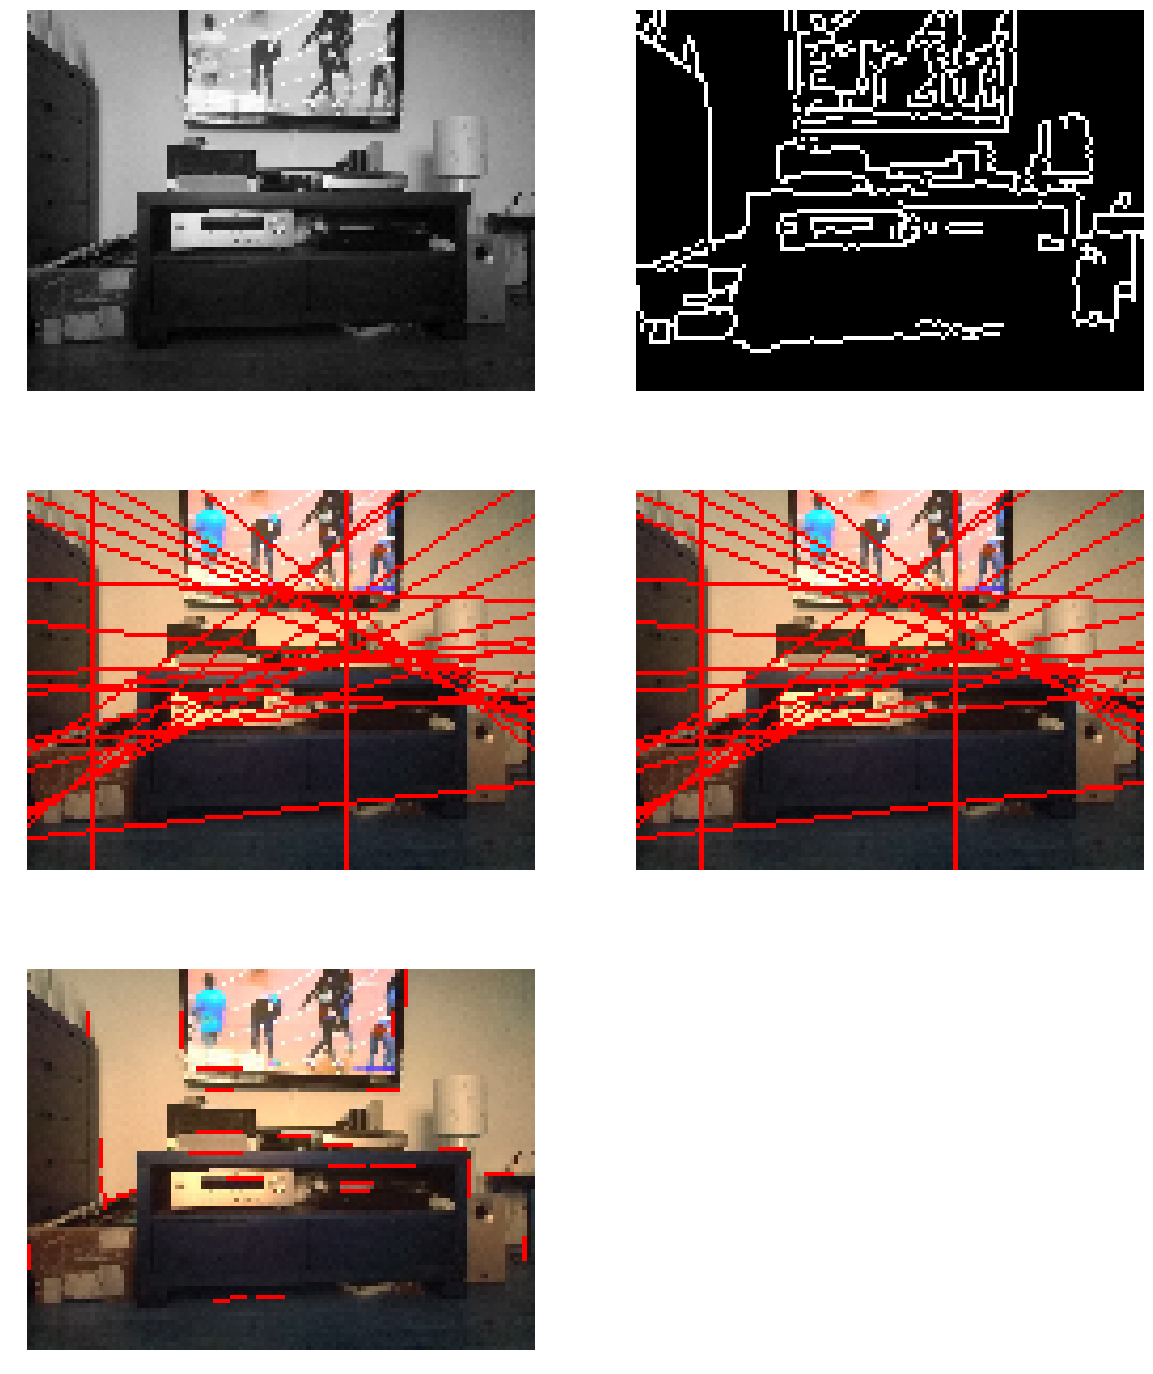

In [6]:
image = images[7]

img = cv2.imread(image)
img = cv2.resize(img, (120,90))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 300)
lines = cv2.HoughLines(edges, 2, np.pi/45, 60)

plt.figure(figsize=(20,25))

plt.subplot(321)
plt.imshow(gray, cmap="gray")
plt.axis('off')

plt.subplot(322)
plt.imshow(edges, cmap="gray")
plt.axis('off')

plt.subplot(323)
img2 = np.copy(img)

lines = [line[0] for line in lines]
for dist, angle in lines:
    a = np.cos(angle)
    b = np.sin(angle)
    x0 = a*dist
    y0 = b*dist
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)
    cv2.line(img2, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(img2)
plt.axis('off')

kmeans = KMeans(init="k-means++", n_clusters=20)
kmeans.fit(lines)
lines = kmeans.cluster_centers_

plt.subplot(324)
img3 = np.copy(img)


for dist, angle in lines:
    a = np.cos(angle)
    b = np.sin(angle)
    x0 = a*dist
    y0 = b*dist
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)
    cv2.line(img3, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(img3)
plt.axis('off')




plt.subplot(325)
img4 = np.copy(img)

lines = cv2.HoughLinesP(edges, 0.5, np.pi/180, 1, 20, 5)
lines = [line[0] for line in lines]
for x1,y1,x2,y2 in lines:
    cv2.line(img4, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(img4)
plt.axis('off')



plt.show()